<a href="https://colab.research.google.com/github/muxair080/Malaria_Detection_DL/blob/main/malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# /content/drive/MyDrive/Malaria dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Malaria Disease Detection

## Importing Dependencies

In [212]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dropout
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
IMAGE_SIZE=[224,224]
train_path = '/content/drive/MyDrive/Malaria dataset/Train'
test_path = '/content/drive/MyDrive/Malaria dataset/Test'

# Load VGG19

In [4]:
vgg19 = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet', 
              include_top=False) 

80134624/80134624 [==============================] - 0s 0us/step


In [5]:
for layer in vgg19.layers:
  layer.trainable = False

In [6]:
folders  = glob('/content/drive/MyDrive/Malaria dataset/Train/*')

In [7]:
folders

['/content/drive/MyDrive/Malaria dataset/Train/Uninfected',
 '/content/drive/MyDrive/Malaria dataset/Train/Parasite']

In [8]:
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
model =  Model(inputs=vgg19.input, outputs=prediction)


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                      shear_range= 0.2,
                      zoom_range = 0.2,
                      horizontal_flip = True
                      )
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
              target_size = (224, 224),
              batch_size = 32,
              class_mode = 'categorical'
              )

Found 416 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
              target_size = (224, 224),
              batch_size = 32,
              class_mode = 'categorical'
              )

Found 134 images belonging to 2 classes.


In [45]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch= len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-45-92f0ef60333d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 7s 504ms/step - loss: 0.2905 - accuracy: 0.8870 - val_loss: 0.4638 - val_accuracy: 0.7388
Epoch 2/50
13/13 [==============================] - 7s 500ms/step - loss: 0.2431 - accuracy: 0.8798 - val_loss: 0.3174 - val_accuracy: 0.8209
Epoch 3/50
13/13 [==============================] - 7s 500ms/step - loss: 0.1754 - accuracy: 0.9423 - val_loss: 0.2889 - val_accuracy: 0.8881
Epoch 4/50
13/13 [==============================] - 6s 495ms/step - loss: 0.1821 - accuracy: 0.9351 - val_loss: 0.2574 - val_accuracy: 0.9104
Epoch 5/50
13/13 [==============================] - 6s 493ms/step - loss: 0.1865 - accuracy: 0.9279 - val_loss: 0.2498 - val_accuracy: 0.9030
Epoch 6/50
13/13 [==============================] - 7s 507ms/step - loss: 0.1755 - accuracy: 0.9447 - val_loss: 0.5562 - val_accuracy: 0.7090
Epoch 7/50
13/13 [==============================] - 7s 497ms/step - loss: 0.1980 - accuracy: 0.9231 - val_loss: 0.2930 - val_accuracy: 0.8433
Epoch 

# Plot Validation Loss

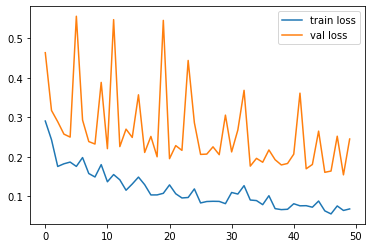

In [46]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

#Training & Validation Accuracy

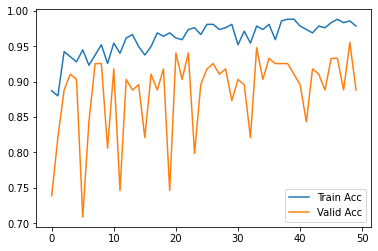

In [47]:
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Valid Acc')
plt.legend()
plt.show();

In [94]:
model.save('model_vgg19.h5')

# Predict Testing Data

In [49]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 184ms/step


In [50]:
y_pred

array([[1.65694151e-02, 9.83430624e-01],
       [8.36348414e-01, 1.63651630e-01],
       [9.84766901e-01, 1.52330343e-02],
       [5.40534377e-01, 4.59465653e-01],
       [9.03341234e-01, 9.66587961e-02],
       [4.44596231e-01, 5.55403769e-01],
       [9.90679443e-01, 9.32050776e-03],
       [3.48626152e-02, 9.65137362e-01],
       [3.87442589e-01, 6.12557471e-01],
       [8.99090111e-01, 1.00909896e-01],
       [8.23634416e-02, 9.17636573e-01],
       [4.52500671e-01, 5.47499359e-01],
       [9.99997735e-01, 2.29558646e-06],
       [4.08665687e-02, 9.59133446e-01],
       [7.00996757e-01, 2.99003214e-01],
       [5.81432274e-03, 9.94185686e-01],
       [2.99791604e-01, 7.00208426e-01],
       [6.05225079e-02, 9.39477503e-01],
       [9.72679436e-01, 2.73206346e-02],
       [9.99844313e-01, 1.55623129e-04],
       [3.42526361e-02, 9.65747356e-01],
       [8.94868553e-01, 1.05131477e-01],
       [9.99926686e-01, 7.33450870e-05],
       [1.97544202e-01, 8.02455783e-01],
       [1.022808

In [51]:
y_pred = np.argmax(y_pred, axis=1)

In [52]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0])

In [53]:
for i in range(len(y_pred)):
  if y_pred[i] == 0:
    print("infected")
  else:
    print("uninfected")



uninfected
infected
infected
infected
infected
uninfected
infected
uninfected
uninfected
infected
uninfected
uninfected
infected
uninfected
infected
uninfected
uninfected
uninfected
infected
infected
uninfected
infected
infected
uninfected
uninfected
uninfected
infected
infected
uninfected
infected
infected
uninfected
uninfected
infected
uninfected
uninfected
uninfected
uninfected
infected
infected
infected
uninfected
infected
infected
infected
infected
infected
infected
uninfected
infected
infected
uninfected
uninfected
uninfected
uninfected
uninfected
infected
infected
uninfected
infected
infected
infected
uninfected
uninfected
uninfected
infected
infected
infected
infected
infected
infected
uninfected
infected
uninfected
uninfected
infected
uninfected
uninfected
infected
infected
infected
infected
uninfected
infected
infected
uninfected
infected
uninfected
infected
infected
uninfected
infected
uninfected
infected
infected
uninfected
infected
uninfected
infected
uninfected
infected
i

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [95]:
model = load_model('model_vgg19.h5')

In [96]:
model

In [159]:
# /content/drive/MyDrive/Malaria dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png
img = image.load_img('/content/drive/MyDrive/Malaria dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_18.png',
                    target_size=(224,224))
# img = image.load_img('/content/drive/MyDrive/Malaria dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_110115_cell_133.png',
                    # target_size=(224,224))

# img = image.load_img('/content/drive/MyDrive/Malaria dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png',
                    # target_size=(224,224))

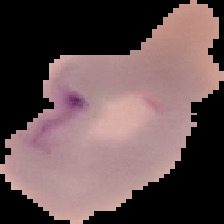

In [160]:
img

In [232]:
# /content/drive/MyDrive/Malaria dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_145.png
img = image.load_img('/content/drive/MyDrive/Malaria dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_145.png'
, target_size=(224,224))


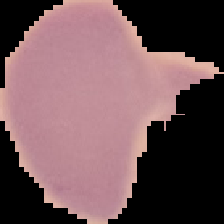

In [233]:
img

In [234]:
x = image.img_to_array(img)

In [235]:
x.shape

(224, 224, 3)

In [236]:
x= x/255

In [237]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
print(img_data.shape)


(1, 224, 224, 3)


In [81]:
# img_data

In [238]:
model.predict(img_data)

1/1 [==============================] - 0s 15ms/step


array([[0.9896086 , 0.01039145]], dtype=float32)

In [239]:
a = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 17ms/step


In [240]:
a

array([0])

In [241]:
if(a==1):
  print('Uninfected')
else:
  print('Infected')

Infected


# Build CNN Model

In [214]:
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=16, kernel_size=2, padding='same', 
          activation='relu', input_shape=(224,224,3)))
model_cnn.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))


model_cnn.add(Conv2D(filters=32, kernel_size=2, padding='same', 
          activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))


model_cnn.add(Conv2D(filters=64, kernel_size=2, padding='same', 
          activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))


model_cnn.add(Flatten())
model_cnn.add(Dense(500, activation='relu'))
model_cnn.add(Dense(2, activation='softmax'))
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

In [215]:
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [216]:
r  = model_cnn.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-216-2ede91bd5b6c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r  = model_cnn.fit_generator(


Epoch 1/50
13/13 [==============================] - 6s 449ms/step - loss: 1.6664 - accuracy: 0.5337 - val_loss: 0.8626 - val_accuracy: 0.3209
Epoch 2/50
13/13 [==============================] - 6s 428ms/step - loss: 0.6994 - accuracy: 0.4760 - val_loss: 0.6721 - val_accuracy: 0.6343
Epoch 3/50
13/13 [==============================] - 6s 433ms/step - loss: 0.6625 - accuracy: 0.6274 - val_loss: 0.6499 - val_accuracy: 0.6791
Epoch 4/50
13/13 [==============================] - 6s 439ms/step - loss: 0.6300 - accuracy: 0.6466 - val_loss: 0.7646 - val_accuracy: 0.3806
Epoch 5/50
13/13 [==============================] - 6s 444ms/step - loss: 0.5818 - accuracy: 0.6995 - val_loss: 0.6918 - val_accuracy: 0.6791
Epoch 6/50
13/13 [==============================] - 6s 430ms/step - loss: 0.5484 - accuracy: 0.7308 - val_loss: 0.9133 - val_accuracy: 0.3731
Epoch 7/50
13/13 [==============================] - 6s 424ms/step - loss: 0.4888 - accuracy: 0.7716 - val_loss: 1.1110 - val_accuracy: 0.3582
Epoch 

# Valid Loss

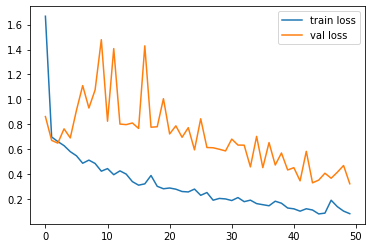

In [217]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Training Accuracy

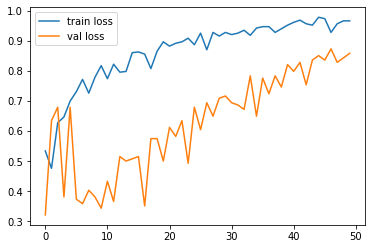

In [218]:
plt.plot(r.history['accuracy'], label='train loss')
plt.plot(r.history['val_accuracy'], label='val loss')
plt.legend()
plt.show()

In [219]:
y_pred = model_cnn.predict(test_set)

5/5 [==============================] - 0s 66ms/step


In [220]:
y_pred = np.argmax(y_pred, axis=1)

In [221]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0])

In [222]:
# cnn_img = image.load_img('/content/drive/MyDrive/Malaria dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_18.png',
                    # target_size=(224,224))
cnn_img = image.load_img('/content/drive/MyDrive/Malaria dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_106.png',
                    target_size=(224,224))

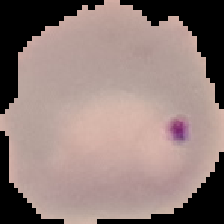

In [192]:
cnn_img

In [223]:
cnn_img = image.load_img('/content/drive/MyDrive/Malaria dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_217.png',
                    target_size=(224,224))

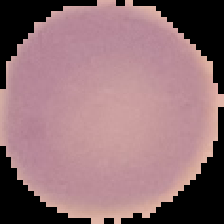

In [224]:
cnn_img

In [225]:
x = image.img_to_array(cnn_img)


In [226]:
x= x/255

In [227]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
print(img_data.shape)


(1, 224, 224, 3)


In [228]:
model_cnn.predict(img_data)

1/1 [==============================] - 0s 69ms/step


array([[1., 0.]], dtype=float32)

In [229]:
a = np.argmax(model_cnn.predict(img_data))

1/1 [==============================] - 0s 18ms/step


In [230]:
a

0

In [231]:
if(a==1):
  print('Uninfected')
else:
  print('Infected')

Infected
